In [778]:
import numpy as np
import matplotlib.pyplot as plt

In [779]:
# Load data from 'data.txt' file, assuming it has rows of space-separated values
data = np.loadtxt('data.txt', dtype=str)

In [780]:
# Extract the number of samples (m) and features (n) from the data shape
m, n = data.shape

In [781]:
# Initialize input features (x) and target values (y)
x = np.zeros((m, 2))
y = np.zeros((m, 1))

In [782]:
# Populate input features and target values from the loaded data
x[:, 0:2] = data[:, 0:2]
y[:, 0] = data[:, 2]


In [783]:
# Initialize theta for gradient descent
theta_gd = np.zeros((3, 1))

In [784]:
# Feature scaling and mean normalization
x1 = np.ones((m, 3))
feature_means = x.mean(axis=0)
feature_stds = np.std(x, axis=0)
x = (x - feature_means) / feature_stds
x1[:, 1:3] = x[:, 0:2]

In [785]:
# Gradient descent parameters
alpha = 0.01
num_iterations = 400
cost_history = np.zeros((num_iterations, 1))
iteration_numbers = np.zeros((num_iterations, 1))

In [786]:
# Perform gradient descent
for i in range(num_iterations):
    h = (x1.dot(theta_gd)) - y
    theta_gd = theta_gd - ((alpha / m) * (x1.T.dot(h)))
    cost = np.sum(np.square(h)) / (2 * m)
    cost_history[i, 0] = cost
    iteration_numbers[i, 0] = i

In [787]:
# Print the learned theta and final cost function value
print(f"Learned theta = {theta_gd}")
final_cost = cost_history[-1, 0]
print(f"Final cost function value = {final_cost}")

Learned theta = [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
Final cost function value = 2106213044.760492


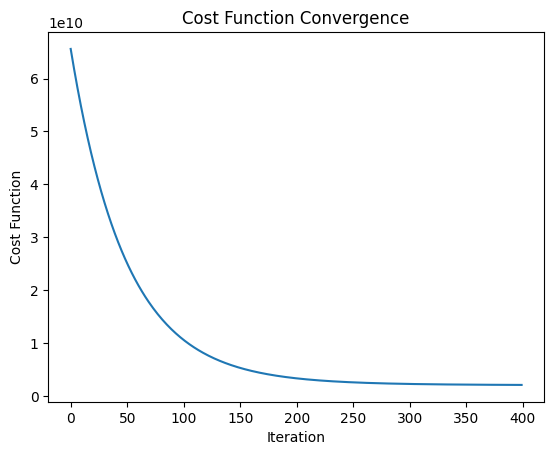

In [788]:
# Plot the cost function convergence
plt.plot(iteration_numbers, cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function Convergence")
plt.show()

In [789]:
# Assuming you have trained theta and normalized input features
normalized_input = np.array([1, (1650 - feature_means[0]) / feature_stds[0], (3 - feature_means[1]) / feature_stds[1]])

In [790]:
# Calculate the predicted price using the learned theta from gradient descent
predicted_price_gd = np.dot(normalized_input, theta_gd)

In [791]:
print(f"Predicted price for 1650 sq ft and 3 rooms (Gradient Descent): {predicted_price_gd[0]:.2f}")

Predicted price for 1650 sq ft and 3 rooms (Gradient Descent): 289221.55


In [792]:
# Normal Equation method for theta calculation
X_matrix = np.ones((m, 3))
X_matrix[:, 1:3] = data[:, 0:2]
X_transpose = X_matrix.T
theta_normal = np.linalg.inv(X_transpose.dot(X_matrix)).dot(X_transpose).dot(y)

In [793]:

# Calculate the predicted price using the learned theta from the normal equation
input_for_normal_eq = np.array([1, 1650, 3])
predicted_price_normal = np.dot(input_for_normal_eq, theta_normal)

print(f"Predicted price for 1650 sq ft and 3 rooms (Normal Equation): {predicted_price_normal[0]:.2f}")

Predicted price for 1650 sq ft and 3 rooms (Normal Equation): 293081.46
